In [1]:
import networkx as nx
import pandas as pd
from rdflib import Graph, RDF, URIRef
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph

from viscars.data import DataLoader
from viscars.evaluation.evaluators.kfoldcv import KFoldCrossValidation
from viscars.evaluation.evaluators.loocv import LeaveOneOutCrossValidation
from viscars.evaluation.metrics import MetricType
from viscars.evaluation.metrics.factory import MetricFactory
from viscars.namespace import DASHB
from viscars.recommenders.factory import RecommenderFactory, RecommenderType
from viscars.utils import clean_graph, visualize_graph

In [2]:
project = 'proeftuin'

graph = Graph()
graph.parse(f'./data/{project}/graph.ttl', format='n3')
d_loader = DataLoader(graph)

metric_factory = MetricFactory()
recommender_factory = RecommenderFactory()

metrics = ['f1@1', 'ndcg@1', 'ndcg@3']
parsed_metrics = []
for metric in metrics:
    m_split = metric.split('@')
    m_type = m_split[0]
    n = int(m_split[1]) if len(m_split) >= 2 else None

    metric_ = metric_factory.get(MetricType.reverse_lookup(m_type), n)
    parsed_metrics.append(metric_)

In [3]:
recommender = recommender_factory.get(RecommenderType.PPR)(graph, alpha=0.3)
recommender.set_personalization(0.7, 0.3)

In [4]:
uid = ['https://dynamicdashboard.ilabt.imec.be/users/8']
cid = ['https://webthing.proeftuin.dynamicdashboard.ilabt.imec.be/things/BBB4/properties/rpm%3A%3Anumber']

recommender.predict(uid, cid)

[{'contextId': ['https://webthing.proeftuin.dynamicdashboard.ilabt.imec.be/things/BBB4/properties/rpm%3A%3Anumber'],
  'itemId': rdflib.term.URIRef('http://localhost/web-thing-gateway/things/visualizations/multiple-time-series-line-chart-with-time-range-selector'),
  'score': 0.0026367088780619875},
 {'contextId': ['https://webthing.proeftuin.dynamicdashboard.ilabt.imec.be/things/BBB4/properties/rpm%3A%3Anumber'],
  'itemId': rdflib.term.URIRef('http://localhost/web-thing-gateway/things/visualizations/traditional-gauge'),
  'score': 0.0006013300878396236},
 {'contextId': ['https://webthing.proeftuin.dynamicdashboard.ilabt.imec.be/things/BBB4/properties/rpm%3A%3Anumber'],
  'itemId': rdflib.term.URIRef('http://localhost/web-thing-gateway/things/visualizations/modern-gauge'),
  'score': 0.0005791116516714218},
 {'contextId': ['https://webthing.proeftuin.dynamicdashboard.ilabt.imec.be/things/BBB4/properties/rpm%3A%3Anumber'],
  'itemId': rdflib.term.URIRef('http://localhost/web-thing-gate

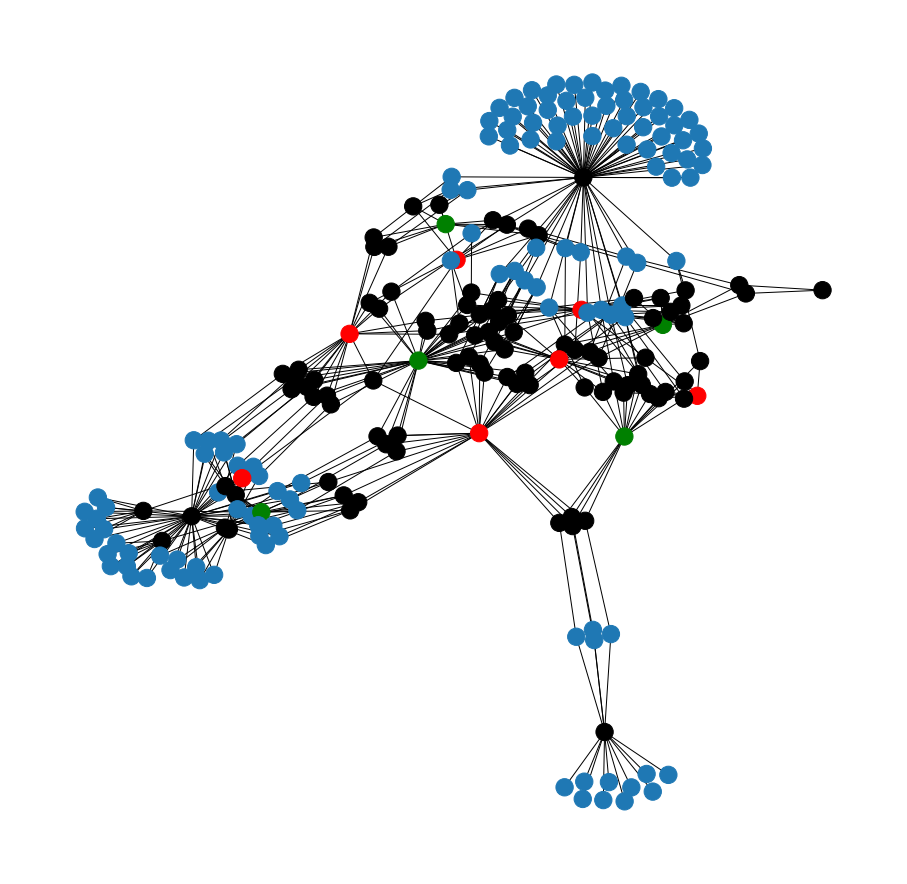

In [5]:
networkx_graph = rdflib_to_networkx_multidigraph(recommender.graph).to_undirected()
visualize_graph(clean_graph(d_loader.graph), colored=True)

In [9]:
shortest_paths = list(nx.all_shortest_paths(networkx_graph, source=URIRef('http://localhost/web-thing-gateway/things/visualizations/multiple-time-series-line-chart-with-time-range-selector'), target=URIRef(uid[0])))
print(len(shortest_paths[0]))
print(len(shortest_paths), shortest_paths)

6 [[rdflib.term.URIRef('http://localhost/web-thing-gateway/things/visualizations/multiple-time-series-line-chart-with-time-range-selector'), rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/widgets/67'), rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/users/8')], [rdflib.term.URIRef('http://localhost/web-thing-gateway/things/visualizations/multiple-time-series-line-chart-with-time-range-selector'), rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/widgets/64'), rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/users/8')], [rdflib.term.URIRef('http://localhost/web-thing-gateway/things/visualizations/multiple-time-series-line-chart-with-time-range-selector'), rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/widgets/65'), rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/users/8')], [rdflib.term.URIRef('http://localhost/web-thing-gateway/things/visualizations/multiple-time-series-line-chart-with-time-range-selector'), rdflib.term.U

In [7]:
shortest_paths = list(nx.all_shortest_paths(networkx_graph, source=URIRef('http://localhost/web-thing-gateway/things/visualizations/multiple-time-series-line-chart-with-time-range-selector'), target=URIRef(cid[0])))
print(len(shortest_paths[0]))
print(len(shortest_paths), shortest_paths)

5
84 [[rdflib.term.URIRef('http://localhost/web-thing-gateway/things/visualizations/multiple-time-series-line-chart-with-time-range-selector'), rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/widgets/2'), rdflib.term.URIRef('https://webthing.proeftuin.dynamicdashboard.ilabt.imec.be/things/BBB4/properties/acc.BPFO%3A%3Anumber'), rdflib.term.URIRef('http://www.w3.org/ns/sosa/ObservableProperty'), rdflib.term.URIRef('https://webthing.proeftuin.dynamicdashboard.ilabt.imec.be/things/BBB4/properties/rpm%3A%3Anumber')], [rdflib.term.URIRef('http://localhost/web-thing-gateway/things/visualizations/multiple-time-series-line-chart-with-time-range-selector'), rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/widgets/64'), rdflib.term.URIRef('https://webthing.proeftuin.dynamicdashboard.ilabt.imec.be/things/BBB4/properties/acc.BPFO%3A%3Anumber'), rdflib.term.URIRef('http://www.w3.org/ns/sosa/ObservableProperty'), rdflib.term.URIRef('https://webthing.proeftuin.dynamicdashboard.il

In [8]:
shortest_paths = list(nx.all_shortest_paths(networkx_graph, target=URIRef(cid[0])))
print(len(shortest_paths[0]))
print(len(shortest_paths), shortest_paths)

3
1 [[rdflib.term.URIRef('http://localhost/web-thing-gateway/things/visualizations/traditional-gauge'), rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/widgets/29'), rdflib.term.URIRef('https://webthing.proeftuin.dynamicdashboard.ilabt.imec.be/things/BBB4/properties/rpm%3A%3Anumber')]]


In [10]:
shortest_paths = list(nx.all_shortest_paths(networkx_graph, source=URIRef('http://localhost/web-thing-gateway/things/visualizations/traditional-gauge'), target=URIRef(uid[0])))
print(len(shortest_paths[0]))
print(len(shortest_paths), shortest_paths)

5
78 [[rdflib.term.URIRef('http://localhost/web-thing-gateway/things/visualizations/traditional-gauge'), rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/widgets/31'), rdflib.term.URIRef('https://docs.dynamicdashboard.ilabt.imec.be/ontologies/dashboard#Widget'), rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/widgets/67'), rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/users/8')], [rdflib.term.URIRef('http://localhost/web-thing-gateway/things/visualizations/traditional-gauge'), rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/widgets/32'), rdflib.term.URIRef('https://docs.dynamicdashboard.ilabt.imec.be/ontologies/dashboard#Widget'), rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/widgets/67'), rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/users/8')], [rdflib.term.URIRef('http://localhost/web-thing-gateway/things/visualizations/traditional-gauge'), rdflib.term.URIRef('https://dynamicdashboard.ilabt.imec.be/widgets/86'), 

### Subgraph

In [17]:
nodes = nx.single_source_shortest_path_length(networkx_graph, URIRef('http://localhost/web-thing-gateway/things/visualizations/traditional-gauge'), cutoff=5).keys()
subgraph = nx.subgraph(networkx_graph, nodes)
print(subgraph)

MultiGraph with 530 nodes and 1489 edges
